<a href="https://colab.research.google.com/github/nguyencong1227/Neural-networks-and-deep-learning/blob/main/K_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
from tensorflow.keras.datasets.mnist import load_data
(X_train, y_train), (X_test, y_test) = load_data()

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


5


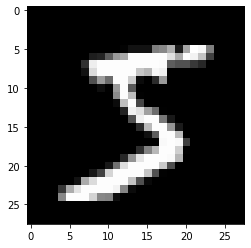

In [ ]:
from matplotlib import pyplot as plt

i = 0
img = X_train[i]
plt.imshow(img, cmap="gray")

print(y_train[i])

Text(0.5, 1.0, 'Test labels')

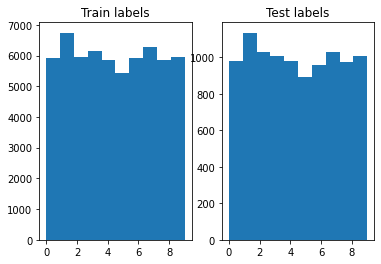

In [ ]:
plt.subplot(1, 2, 1)
plt.hist(y_train)
plt.title("Train labels")

plt.subplot(1, 2, 2)
plt.hist(y_test)
plt.title("Test labels")

In [ ]:
X_train_norm = np.array([x.ravel() / 255. for x in X_train])
X_test_norm = np.array([x.ravel() / 255. for x in X_test])

In [ ]:
# Output

y_train_onehot = np.zeros((X_train.shape[0], 10))
for i in range(X_train.shape[0]):
  y_train_onehot[i, y_train[i]] = 1.0

y_test_onehot = np.zeros((X_test.shape[0], 10))
for i in range(X_test.shape[0]):
  y_test_onehot[i, y_test[i]] = 1.0

print(y_train_onehot.shape, y_test_onehot.shape)
print(y_train_onehot[0])

(60000, 10) (10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# Class SigmoidLayer

g = lambda z: 1/ (1 + np.exp(-z))
class SigmoidLayer:
  def __init__(self, n_inp, n_out, bias = True):
    if bias: n_inp += 1
    w = np.random.randn(n_inp, n_out)
    self.w = w
    self.bias = bias
    self.is_forword = False

  def forword(self, X):
    if self.bias:
      X = np.hstack((np.ones((X.shape[0], 1)), X))

    z = np.dot(X, self.w)
    a = g(z)

    self.is_forword = True
    self.x = X
    self.a = a
    return a

  def back_propagation(self, delta):
    a = self.a
    dw = np.dot(self.x.T, delta * a * (1.0 - a ))

    if self.bias:
      da = np.dot(delta * a * (1.0 - a), self.w.T)[:, 1:]
    else:
      da = np.dot(delta * a * (1.0 - a), self.w.T)

    return dw, da

In [ ]:
# Class Softmaxlayer

class Softmaxlayer:
  def __init__(self, n_inp, n_out, bias = True):
    if bias: n_inp += 1
    w = np.random.randn(n_inp, n_out)
    self.w = w
    self.bias = bias
    self.is_forword = False

  def forword(self, X):
    if self.bias:
      X = np.hstack((np.ones((X.shape[0], 1)), X))

    z = np.dot(X, self.w)
    e = np.exp(z)
    s = np.sum(e, axis = 1, keepdims = True)

    self.is_forword = True
    self.x = X

    return e / s

  def back_propagation(self, delta):
    dw = np.dot(self.x.T, delta)

    if self.bias:
      da = np.dot(delta, self.w.T)[:, 1:]
    else:
      da = np.dot(delta, self.w.T)

    return dw, da

In [ ]:
def loss(y_true, y_pred):
  return -np.mean((y_true * np.log(y_pred)))

def predict(X, model):
  for l in model:
    X = l.forword(X)
  return X

In [ ]:
#settings
NDIMS = 784
L1 = 64
L2 = 64
L3 = 32
EPOCHS = 100
LR = 0.0001

layers = [SigmoidLayer(NDIMS, L1, bias = False),
          SigmoidLayer(L1, L2),
          SigmoidLayer(L2, L3),
          Softmaxlayer(L3, 10)]

In [ ]:
def train_step(X, y, model, lr = 0.001):
  y_pred = predict(X, model)
  delta = y_pred - y

  for l in reversed(model):
    dw, delta = l.back_propagation(delta)
    l.w -= lr * dw

#for i in range(EPOCHS):
#   train_step(X_train_scaled, y_train, model = layers)

In [ ]:
#use momentum_train_step

def momentum_train_step(X, y, model, lr = 0.001, gamma = 0.6):
  y_pred = predict(X, model)
  delta = y_pred - y

  for l in reversed(model):
    dw, delta = l.back_propagation(delta)
    l.w -= (lr * dw + gamma * l.w)

In [ ]:
def batch_generator(X, y, batch_size=500):
  idx = np.arange(X.shape[0])
  np.random.shuffle(idx)

  n_batch = len(idx) // batch_size
  for i in range(n_batch):
    i_start = i * batch_size
    i_stop = min((i + 1) * batch_size, len(idx))

    yield X[i_start:i_stop, :], y[i_start:i_stop, :]

In [ ]:
history_loss = []
for i in range(50):
  for X_batch, y_batch in batch_generator(X_train_norm, y_train_onehot):
    train_step(X_batch, y_batch, layers)

  y_pred = predict(X_train_norm, layers)
  loss_ = loss(y_train_onehot, y_pred)
  print(f"loss: {loss_}")
  history_loss.append(loss_)

loss: 0.019841787656976098
loss: 0.01958843769970798
loss: 0.019340179004224006
loss: 0.019098215872833637
loss: 0.018862470622649813
loss: 0.01863272476647429
loss: 0.01840874877571168
loss: 0.018190321444753584
loss: 0.01797723233439116
loss: 0.017769280950778447
loss: 0.01756627549144379
loss: 0.01736803176342931
loss: 0.01717437224426511
loss: 0.016985125110567777
loss: 0.016800123167047612
loss: 0.016619202812942657
loss: 0.016442203306354746
loss: 0.016268966527489086
loss: 0.016099337249619993
loss: 0.01593316375694608
loss: 0.015770298620061754
loss: 0.015610599535960903
loss: 0.0154539302477108
loss: 0.015300161593703069
loss: 0.015149172707031894
loss: 0.01500085234704015
loss: 0.014855100313903823
loss: 0.014711828841970967
loss: 0.014570963769064568
loss: 0.014432445167734159
loss: 0.014296227063948782
loss: 0.01416227592459545
loss: 0.014030567805899858
loss: 0.013901084389813887
loss: 0.013773808479880271
loss: 0.01364871974338407
loss: 0.013525791484406947
loss: 0.013404

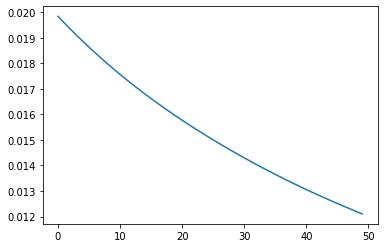

In [ ]:
plt.plot(history_loss)

In [ ]:
y_pred = predict(X_test_norm, model = layers)
y_pred = np.argmax(y_pred, axis = 1)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.94      0.93      0.94      1032
           3       0.94      0.92      0.93      1010
           4       0.94      0.93      0.94       982
           5       0.89      0.94      0.91       892
           6       0.94      0.95      0.94       958
           7       0.95      0.94      0.94      1028
           8       0.93      0.90      0.92       974
           9       0.92      0.91      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



# Activity 5

In [ ]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

inp = Input(shape=(784, ))
x = Dense(units = 64, activation = "sigmoid", )(inp)
x = Dense(units = 64, activation = "sigmoid")(x)
y = Dense(units = 10, activation = "softmax")(x)

model = Model(inputs = inp, outputs = y)
model.summary()

In [ ]:
model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=['acc'])

In [ ]:
a = model.fit(X_train_norm, y_train_onehot, batch_size = 512, epochs=50, validation_split=0.2)

In [ ]:
y_pred = model.predict(X_test_norm)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))